In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from fastai import *        # Quick accesss to most common functionality
from fastai.text import *   # Quick accesss to NLP functionality
import html

## Data

## Loading data

In [3]:
PATH=Path('data/wikitext-2')

In [4]:
bs = 64
bptt = 70

In [5]:
data = TextLMDataBunch.load(PATH, bs=bs, bptt=bptt)

In [6]:
learn = language_model_learner(data, clip=0.2)

In [6]:
# learn.opt_fn = partial(optim.Adam, betas=(0.8,0.99))
# learn.callback_fns.extend([partial(GradientClipping, clip=0.12)])

In [7]:
epoch = 12
lr = 1e-3
momentum = (0.8,0.7)
weight_decay = 1.2e-6

In [8]:
learn.fit_one_cycle(epoch, lr, moms=momentum, wd=weight_decay)

epoch,train_loss,valid_loss,accuracy
1,1.659695,1.592150,0.769428
2,1.450114,1.391702,0.789441
3,1.345355,1.301409,0.794150
4,1.277250,1.242548,0.799336
5,1.221575,1.203269,0.802358
6,1.190979,1.181212,0.804040
7,1.163385,1.165855,0.805572
8,1.137971,1.153507,0.806700
9,1.109951,1.147346,0.807369
10,1.097416,1.142556,0.807870


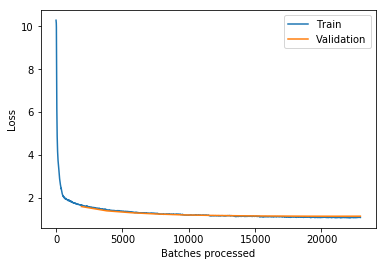

In [9]:
learn.recorder.plot_losses()

In [10]:
learn.save('lstm_wt2')

### Testing (for fun)

In [11]:
learn.load('lstm_wt2'); learn.model.eval();

In [12]:
x_str = "The online encyclopedia project Wikipedia is the most popular wiki-based website, and is"

In [13]:
pred_out = learn.predict(x_str, n_words=500)

In [14]:
pred_out

'The online encyclopedia project Wikipedia is the most popular wiki-based website, and is \' , \' especially \' , \' abusive \' , \' and \' , \' often \' , \' usually \' , \' cabaret \' , \' . \' , \' xxmaj in \' , \' a \' , \' larger \' , \' range \' , \' , \' , \' there \' , \' are \' , \' overwhelming \' , \' retro \' , \' october \' , \' for \' , \' management \' , \' : \' , \' if \' , \' not \' , \' xxmaj fe \' , \' does \' , \' not \' , \' originally \' , \' be \' , \' distinguished \' , \' , \' , \' it \' , \' is \' , \' not \' , \' unusual \' , \' for \' , \' this \' , \' species \' , \' . \' ] xxbos [ \' xxmaj in \' , \' addition \' , \' to \' , \' thousands \' , \' as \' , \' of \' , \' 2006 \' , \' the \' , \' city \' , \' was \' , \' the \' , \' most \' , \' important \' , \' test \' , \' to \' , \' the \' , \' xxmaj united \' , \' xxmaj states \' , \' , \' , \' but \' , \' no \' , \' part \' , \' ( \' , \' the \' , \' party \' , \' @-@ \' , \' an \' , \' abstract \' , \' g